# Problem: *predict engine failure*

# Description:

Based on data obtained from each engine cycle and from additional settings predict the crash of an engine on the next cycle.
The max cycle of an engine - is the last cycle before crash.
Make a proposal how to use this model in practice. 
Construct an alternative problem statement.

# Data:

Initial data - Excel-file with 16.138 engine cycles.

Columns:
* id - engine id
* cycle - no. of cycle
* p00-p20 - values of sensors during cycle
* s0, s1 - settings correspond to definite cycle

Each cycle is characterized by 23 values (21 'p' - averaged values from sensors during the cycle and 2's' - settings during the current cycle). The last cycle of engine is the last cycle before crash. 

# Python Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

# EDA

In [3]:
#checking null-values in data
data.isnull().sum()

id       0
cycle    0
p00      0
p01      0
p02      0
p03      0
p04      0
p05      0
p06      0
p07      0
p08      0
p09      0
p10      0
p11      0
p12      0
p13      0
p14      0
p15      0
p16      0
p17      0
p18      0
p19      0
p20      0
s1       0
s2       0
dtype: int64

In [4]:
data.head()

id  cycle     p00  p01    p02     p03      p04      p05     p06   p07  ...  \
0   1      1  518.67  1.3  47.47  521.66  2388.02  8138.62  8.4195  0.03  ...   
1   1      2  518.67  1.3  47.49  522.28  2388.07  8131.49  8.4318  0.03  ...   
2   1      3  518.67  1.3  47.27  522.42  2388.03  8133.23  8.4178  0.03  ...   
3   1      4  518.67  1.3  47.13  522.86  2388.08  8133.83  8.3682  0.03  ...   
4   1      5  518.67  1.3  47.28  522.19  2388.04  8133.80  8.4294  0.03  ...   

       p13      p14      p15    p16    p17     p18      p19      p20      s1  \
0  23.4190  1589.70  1400.60  14.62  21.61  554.36  2388.06  9046.19 -0.0007   
1  23.4236  1591.82  1403.14  14.62  21.61  553.75  2388.04  9044.07  0.0019   
2  23.3442  1587.99  1404.20  14.62  21.61  554.26  2388.08  9052.94 -0.0043   
3  23.3739  1582.79  1401.87  14.62  21.61  554.45  2388.11  9049.48  0.0007   
4  23.4044  1582.85  1406.22  14.62  21.61  554.00  2388.06  9055.15 -0.0019   

       s2  
0 -0.0004  
1 -0.0003  
2  0.0003  
3  0.0000  
4 -0.0002  

[5 rows x 25 columns]

In [5]:
data.tail()

id  cycle     p00  p01    p02     p03      p04      p05     p06   p07  \
16133  80    181  518.67  1.3  48.17  520.44  2388.17  8218.63  8.5194  0.03   
16134  80    182  518.67  1.3  48.41  520.06  2388.12  8221.91  8.5493  0.03   
16135  80    183  518.67  1.3  48.04  519.67  2388.21  8217.46  8.5106  0.03   
16136  80    184  518.67  1.3  48.04  519.72  2388.20  8228.65  8.4983  0.03   
16137  80    185  518.67  1.3  48.05  520.00  2388.18  8229.73  8.5250  0.03   

       ...      p13      p14      p15    p16    p17     p18      p19      p20  \
16133  ...  23.1678  1604.26  1428.92  14.62  21.61  552.24  2388.20  9145.62   
16134  ...  23.0142  1598.32  1426.31  14.62  21.61  551.60  2388.16  9160.23   
16135  ...  22.9337  1603.37  1434.30  14.62  21.61  551.78  2388.12  9152.84   
16136  ...  22.9971  1603.01  1430.23  14.62  21.61  551.78  2388.17  9164.10   
16137  ...  23.0323  1606.38  1421.41  14.62  21.61  551.55  2388.22  9170.57   

           s1      s2  
16133  0.0042  0.0002  
16134 -0.0014  0.0004  
16135  0.0018  0.0000  
16136 -0.0024  0.0002  
16137  0.0015  0.0000  

[5 rows x 25 columns]

In [6]:
#get statistics about data
data.describe()

id         cycle           p00           p01           p02  \
count  16138.000000  16138.000000  1.613800e+04  1.613800e+04  16138.000000   
mean      40.707894    105.548147  5.186700e+02  1.300000e+00     47.544263   
std       23.395354     65.915295  6.275708e-11  3.932532e-13      0.267422   
min        1.000000      1.000000  5.186700e+02  1.300000e+00     46.860000   
25%       20.000000     51.000000  5.186700e+02  1.300000e+00     47.350000   
50%       42.000000    101.000000  5.186700e+02  1.300000e+00     47.520000   
75%       61.000000    153.000000  5.186700e+02  1.300000e+00     47.710000   
max       80.000000    362.000000  5.186700e+02  1.300000e+00     48.530000   

                p03           p04           p05           p06           p07  \
count  16138.000000  16138.000000  16138.000000  16138.000000  1.613800e+04   
mean     521.405420   2388.096737   8143.933458      8.442581  3.000000e-02   
std        0.738252      0.072604     19.731349      0.037520  1.230304e-14   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.940000   2388.040000   8132.830000      8.415300  3.000000e-02   
50%      521.460000   2388.090000   8140.750000      8.439800  3.000000e-02   
75%      521.940000   2388.140000   8148.817500      8.466000  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

       ...           p13           p14           p15           p16  \
count  ...  16138.000000  16138.000000  16138.000000  1.613800e+04   
mean   ...     23.288552   1590.582096   1409.033729  1.462000e+01   
std    ...      0.108606      6.129960      8.977073  3.044770e-12   
min    ...     22.907100   1571.040000   1382.250000  1.462000e+01   
25%    ...     23.220600   1586.330000   1402.500000  1.462000e+01   
50%    ...     23.296300   1590.190000   1408.220000  1.462000e+01   
75%    ...     23.365600   1594.450000   1414.650000  1.462000e+01   
max    ...     23.612700   1614.930000   1441.490000  1.462000e+01   

                p17           p18           p19           p20            s1  \
count  16138.000000  16138.000000  16138.000000  16138.000000  16138.000000   
mean      21.609795    553.359776   2388.097368   9065.461291      0.000010   
std        0.001417      0.887947      0.071608     22.781362      0.002188   
min       21.600000    549.850000   2387.900000   9021.730000     -0.008600   
25%       21.610000    552.800000   2388.050000   9052.820000     -0.001400   
50%       21.610000    553.430000   2388.090000   9060.750000      0.000000   
75%       21.610000    554.000000   2388.140000   9069.940000      0.001500   
max       21.610000    556.060000   2388.560000   9244.590000      0.008700   

                 s2  
count  1.613800e+04  
mean   6.196555e-08  
std    2.939096e-04  
min   -6.000000e-04  
25%   -3.000000e-04  
50%    0.000000e+00  
75%    3.000000e-04  
max    6.000000e-04  

[8 rows x 25 columns]

We see that some columns have zero std (or very close to 0) that means that value in these columns is constant. 

Let's check:

In [7]:
data.columns[data.nunique() <= 1]

Index(['p00', 'p01', 'p07', 'p09', 'p10', 'p16'], dtype='object')

Columns with constant values are useless so I will drop them.

In [8]:
data.drop(data.columns[data.nunique() <= 1], axis=1, inplace=True)

Text(0.5, 1.0, 'Normalized distribution of work-cycles among all engines')

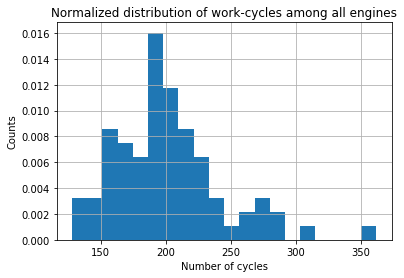

In [9]:
plt.hist(data[['id', 'cycle']].groupby(['id']).agg(['count']).values, density=True, bins = 20)
plt.xlabel('Number of cycles')
plt.ylabel('Counts')
plt.grid()
plt.title('Normalized distribution of work-cycles among all engines')

In [10]:
for i in ['02', '03', '04', '05', '06', '08', '11', '12', '13', '14', '15', '17', '18', '19', '20']:
    data['dif' + i] = data.groupby(['id'])['p' + i].diff()

In [11]:
# create extra dataframe with no. of last cycle
max_cycle = pd.DataFrame(data[['id', 'cycle']].groupby(['id']).agg(['count']))
max_cycle.columns = ['last_cycle']
max_cycle.reset_index(inplace=True)
#merge max_cycle dataframe to the initial data
data = pd.merge(data, max_cycle, how = 'left')
data['cycles_before_crash'] = data['last_cycle'] - data['cycle']

In [12]:
data.columns

Index(['id', 'cycle', 'p02', 'p03', 'p04', 'p05', 'p06', 'p08', 'p11', 'p12',
       'p13', 'p14', 'p15', 'p17', 'p18', 'p19', 'p20', 's1', 's2', 'dif02',
       'dif03', 'dif04', 'dif05', 'dif06', 'dif08', 'dif11', 'dif12', 'dif13',
       'dif14', 'dif15', 'dif17', 'dif18', 'dif19', 'dif20', 'last_cycle',
       'cycles_before_crash'],
      dtype='object')

In [13]:
data.drop(['id', 'cycle','last_cycle'], axis=1, inplace=True)

In [14]:
data.columns

Index(['p02', 'p03', 'p04', 'p05', 'p06', 'p08', 'p11', 'p12', 'p13', 'p14',
       'p15', 'p17', 'p18', 'p19', 'p20', 's1', 's2', 'dif02', 'dif03',
       'dif04', 'dif05', 'dif06', 'dif08', 'dif11', 'dif12', 'dif13', 'dif14',
       'dif15', 'dif17', 'dif18', 'dif19', 'dif20', 'cycles_before_crash'],
      dtype='object')

In [133]:
# the first row for each engine has Null values
data.dropna(inplace=True)

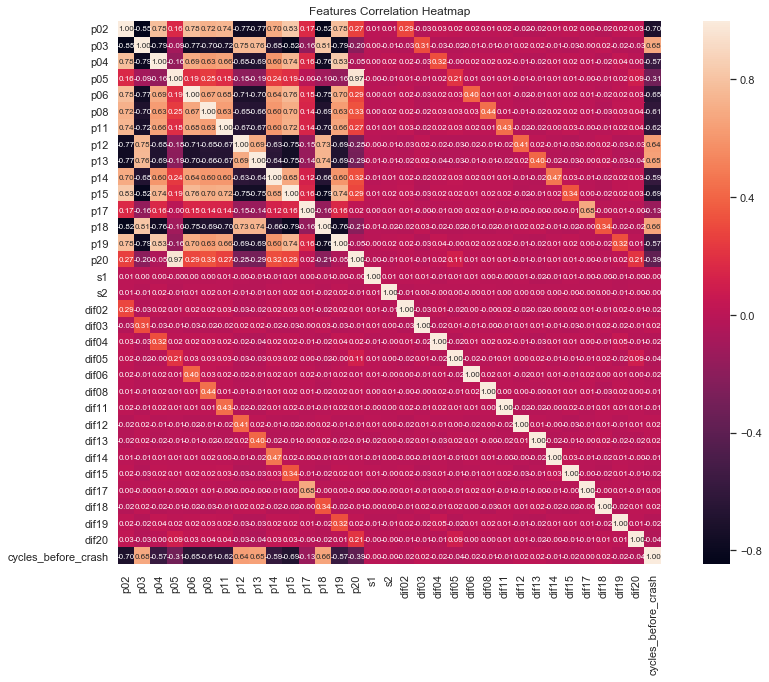

In [16]:
import seaborn as sns
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(15, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=data.columns, xticklabels=data.columns)
plt.title('Features Correlation Heatmap')
plt.show()

# Train-test split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
features = ['p02', 'p03', 'p04', 'p05', 'p06', 'p08', 'p11', 'p12', 'p13', 'p14',
       'p15', 'p17', 'p18', 'p19', 'p20', 's1', 's2', 'dif02', 'dif03',
       'dif04', 'dif05', 'dif06', 'dif08', 'dif11', 'dif12', 'dif13', 'dif14',
       'dif15', 'dif17', 'dif18', 'dif19', 'dif20']
X = data[features]
y = data['cycles_before_crash']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(array([5.11006289e-03, 5.14675052e-03, 5.14150943e-03, 4.83228512e-03,
        3.84696017e-03, 2.37421384e-03, 7.91404612e-04, 3.61635220e-04,
        1.15303983e-04, 5.76519916e-05]),
 array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.]),
 <a list of 10 Patch objects>)

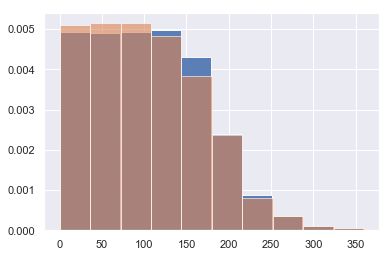

In [21]:
plt.hist(y_train, density = True, label = 'Train', alpha = 0.9)
plt.hist(y_test, density = True, label = 'Test', alpha = 0.6)

We see that output-train and output-test are distributed equally.

# Create model

In [23]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
# # scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_norm = scaler.fit_transform(X_train)
# X_test_norm = scaler.transform(X_test)

### Let us start from the *linear regression* as a baseline.
#### The main metric (for regression) will be the coefficient of determination - r2.

In [25]:
#try linear regression. We do not apply StandardSCaler because it is already included in the LinearRegression() by default.
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train.values)

y_test_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

R^2 training: 0.604, R^2 test: 0.596


In [27]:
r2_train = cross_val_score(lin_reg, X_train, y_train.values, cv=3).mean()
r2_test = metrics.r2_score(y_test, y_test_pred)

In [28]:
f'r2 train: {r2_train}, test: {r2_test}' 

'R^2 train: 0.6001956573397964, test: 0.5962043946932865'

Scores are close - that's good (no overfitting), but not very high.

In [55]:
# function to plot real values vs predicted to see the areas of the biggest difference
def real_vs_predict(y_real, y_pred):    
    plt.scatter(y_real, y_pred, marker='o')
    x=np.linspace(-10, 220, 10)
    plt.plot(x,x,'r-', linewidth=3)
    plt.xlabel('Real')
    plt.ylabel('Predicted')
    plt.show()

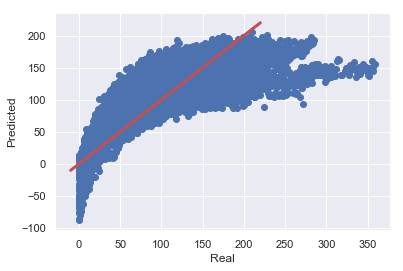

In [52]:
real_vs_predict(y_train, y_train_pred)

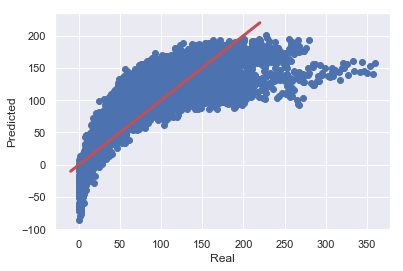

In [53]:
real_vs_predict(y_test, y_test_pred)

### The next model to try is *Random Forest*

In [56]:
rf = RandomForestRegressor(max_depth=7, random_state=123, n_jobs = -1).fit(X_train, y_train)
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

C:\Users\RU20020752\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
r2_train = cross_val_score(rf, X_train, y_train.values, cv=3).mean()
r2_test = metrics.r2_score(y_test, y_test_pred)

In [62]:
f'r2 train: {r2_train}, test: {r2_test}' 

'R^2 train: 0.6413309904792154, test: 0.6371607146011808'

It could be seen that scores are better than with the baseline - model. 

Let us check what is mean absolute error - how much does algorithm fail. 

In [64]:
f'MAE train: {metrics.mean_absolute_error(y_train, y_train_pred)}, test: {metrics.mean_absolute_error(y_test, y_test_pred)}'

'MAE train: 25.703499735006346, test: 27.980475225222225'

MAE is rather high thats why if we want to predict exact number of cycles before crash this approach doesn't show great result.

RF has a great opportunity to demostrate feature importance - the relative value of how many times does the feature take part in the tree-child splitting. If the feature was chosen many more times than others in the process of splitting it means that it is very important for constructing good quality regression tree.

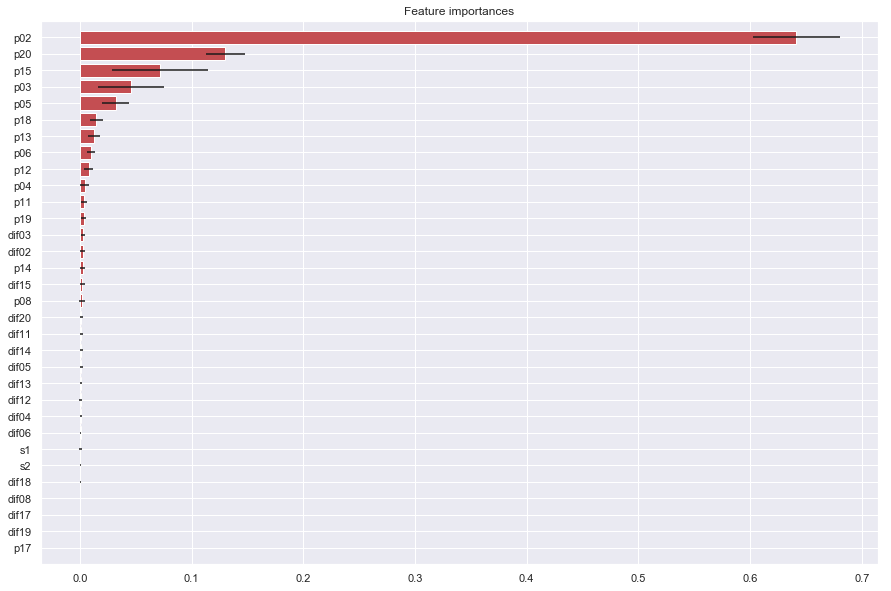

In [67]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances) 
plt.figure(figsize = (15, 10))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices], color="r", xerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), X_train.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

As it could be seen, many of features have low importancy. Noise? ... 
Lets try and chech the hypothesis - select 12 most important features and try to build model only with them.

In [68]:
X_tr = X_train[X_train.columns[indices][:-12]]
X_ts = X_test[X_train.columns[indices][:-12]]

In [70]:
rf_cut = RandomForestRegressor(max_depth=7, random_state=123, n_jobs = -1).fit(X_tr, y_train)
y_test_pred = rf_cut.predict(X_ts)
y_train_pred = rf_cut.predict(X_tr)

C:\Users\RU20020752\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
r2_train = cross_val_score(rf_cut, X_train, y_train.values, cv=3).mean()
r2_test = metrics.r2_score(y_test, y_test_pred)

In [74]:
print(f'r2 train: {r2_train}, test: {r2_test}' )
print(f'MAE train: {metrics.mean_absolute_error(y_train, y_train_pred)}, test: {metrics.mean_absolute_error(y_test, y_test_pred)}')

R^2 train: 0.6413309904792154, test: 0.493218603269979
MAE train: 33.07848690045776, test: 35.46449030536714


The r2 score on test has dramatically dropped. That means that the model doesn't have enough generalizing ability. Also MAE error has increased. 

### *xgboost*

In [134]:
# gradient boosting for regression in scikit-learn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold

In [135]:
gb = GradientBoostingRegressor().fit(X_train, y_train.values)
y_test_pred = gb.predict(X_test)
y_train_pred = gb.predict(X_train)

In [136]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=123)
r2_train = cross_val_score(gb, X_train, y_train.values, scoring='r2', cv=cv, n_jobs=-1, error_score='raise').mean()
r2_test = metrics.r2_score(y_test, y_test_pred)

In [137]:
print(f'r2 train: {r2_train}, test: {r2_test}' )
print(f'MAE train: {metrics.mean_absolute_error(y_train, y_train_pred)}, test: {metrics.mean_absolute_error(y_test, y_test_pred)}')

r2 train: 0.6586452217652267, test: 0.6486416821063223
MAE train: 25.705478356453288, test: 27.684208568757654


Again - better values than in RF

Lets make a GridSearch and try to find parameters of GB more carefully.

In [80]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
parameters = {'max_depth': [3, 5, 7],
              'n_estimators': [80, 90, 100, 110, 120],
              'learning_rate': [0.1, 0.05, 0.15]}

grid_search = GridSearchCV(estimator=gb,
                           param_grid=parameters,
                           scoring='r2',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  5.6min finished


In [81]:
grid_search.best_score_ 

0.6616677116782397

In [82]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 110}

#### One more idea was to test GB with other loss - 'huber'. This loss "approximates" MAE loss.

In [84]:
gb = GradientBoostingRegressor()
parameters = {'max_depth': [3, 5, 7],
              'n_estimators': [80, 90, 100, 110, 120],
              'learning_rate': [0.1, 0.05, 0.15],
              'loss': ['huber']}

grid_search = GridSearchCV(estimator=gb,
                           param_grid=parameters,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  6.8min finished


In [85]:
grid_search.best_params_

{'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'n_estimators': 110}

Lets consider both models together and see the difference. 

In [86]:
model1 = GradientBoostingRegressor(learning_rate=0.05, max_depth = 5, n_estimators = 110)
model2 = GradientBoostingRegressor(learning_rate=0.05, max_depth = 5, n_estimators = 110, loss = 'huber')

In [87]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=110,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [95]:
y_test_predict1 = model1.predict(X_test)
y_test_predict2 = model2.predict(X_test)

y_train_predict1 = model1.predict(X_train)
y_train_predict2 = model2.predict(X_train)

In [107]:
r2_train_1 = cross_val_score(model1, X_train, y_train.values, cv=3).mean()
r2_test_1 = metrics.r2_score(y_test, y_test_predict1)

r2_train_2 = cross_val_score(model2, X_train, y_train.values, cv=3).mean()
r2_test_2 = metrics.r2_score(y_test, y_test_predict2)

In [108]:
print('Model1')
print(f'r2 train: {r2_train_1}, test: {r2_test_1}' )
print(f'MAE train: {metrics.mean_absolute_error(y_train, y_train_predict1)}, test: {metrics.mean_absolute_error(y_test, y_test_predict1)}')

print('Model2')
print(f'r2 train: {r2_train_2}, test: {r2_test_2}' )
print(f'MAE train: {metrics.mean_absolute_error(y_train, y_train_predict2)}, test: {metrics.mean_absolute_error(y_test, y_test_predict2)}')

Model1
R^2 train: 0.6608463357916584, test: 0.6518676885708601
MAE train: 23.65054076485365, test: 27.163643861765543
Model2
R^2 train: 0.6611974675674682, test: 0.6537173436204847
MAE train: 23.271479389327958, test: 26.76399479110936


Here we could see that both models show comparable results but GB with Huber loss is a little bit better.

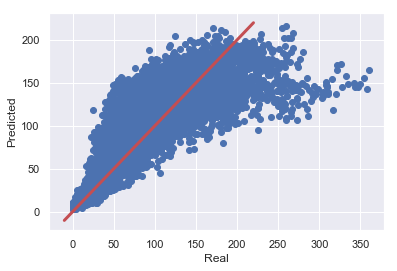

In [112]:
# RRMS optimization
real_vs_predict(y_test, y_test_predict1)

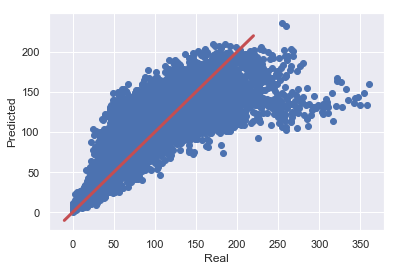

In [111]:
# "MAE" optimization
real_vs_predict(y_test, y_test_predict2)

# Results

GradientBoostingRegression became the best regression model that showed results:

In [125]:
print(f'r2 train: {r2_train_2 *100 :.1f}%, test: {r2_test_2*100 :.1f}' )
print(f'MAE train: {metrics.mean_absolute_error(y_train, y_train_predict2):.1f}, test: {metrics.mean_absolute_error(y_test, y_test_predict2):.1f}')

R^2 train: 66.1%, test: 65.4
MAE train: 23.3, test: 26.8


This model was planned to be used as predicting at each cycle how many cycles to remain. But because of the fact that this model doesn't show high quality it could't be used by the direct application. By diagrams it could be mentioned that at high values model distortions become higher. May be, then, it's not reasonable and usefull to have the exact number of remaining cycles but to have info if in next N cycles crach happens? It gives some thoughts for another approach developing ... 

# Next Steps

#### 1. First of all I would recommend to test other modified datasets. For instance, add new features such as:
* mean of sensor data in a window (window = 2, 3, ... )
* derivatives of features calculated in window
* ....


#### 2. Study more precisely signals from sensors (may be they have outliers?)

#### 3. Try completely different models, for instance, NN.

#### 4. Consider other approach

# Another approach

The first my idea of solving this problem was to build a binary classifier on given data labeling rows as: 
last row in cycle - 1 class, not last row - 0 class. The problem here, first of all, is that classes are disbalanced. 
This could be somehow solved by using Precision / Recall evaluation (instead of AUC ROC). 
But nevertheless I'm not shure that this approach is quite usefull.


The second idea, based on thoughts after regression analysis, is about splitting the ranges of cycles before crash into 
some groups and predict the group. In engine-crash-tasks it's not necessary to predict exact cycle of crash. More important is
just to know if the machine will fail in the next N cycles. In that way the problem will 
be multiclass classification problem.In more detail, we could construct several groups, for instance:
group 1 - the engine will fail in 10 cycles, group 2 - the engine will fail in 20 cycles,... 
and label each row with the corresponding value. In that way we will have multiclass classification problem that may help 
to eliminate the unimportant differencies between predicted value and real 
(for instance, the difference between failure cycle no.100 and failure cycle no.120)